In [1]:
#Lets import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data Collection and Pre-processing

In [2]:
#loading csv data to pandas dataframe
heart = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\heart2.csv")

In [3]:
#printing the first 5 rows of dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#printing the rows and columns
heart.shape

(300, 14)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trestbps  300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    int64  
 6   restecg   300 non-null    int64  
 7   thalach   300 non-null    int64  
 8   exang     300 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slope     300 non-null    int64  
 11  ca        300 non-null    int64  
 12  thal      300 non-null    int64  
 13  target    300 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.9 KB


In [6]:
#finding the null value
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#checking the distribution of target column
heart['target'].value_counts()

1    159
0    141
Name: target, dtype: int64

### Splitting the training and test data

In [8]:
X = heart.drop(columns='target',axis=1)
Y = heart['target']

In [9]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
295   67    1   0       100   299    0        0      125      1      0.9   
296   67    1   0       120   237    0        1       71      0      1.0   
297   58    1   0       150   270    0        0      111      1      0.8   
298   35    1   1       122   192    0        1      174      0      0.0   
299   52    1   1       120   325    0        1      172      0      0.2   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [10]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    1
299    1
Name: target, Length: 300, dtype: int64


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [12]:
print(X.shape, X_train.shape,X_test.shape)

(300, 13) (240, 13) (60, 13)


### Model Training

In [13]:
model = LogisticRegression(max_iter=1000)

In [14]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation 

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy  = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

0.9


In [23]:
print("Accuracy on the training data ",round(training_data_accuracy*100,2),'%')

Accuracy on the training data  90.0 %


In [24]:
#accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.8666666666666667


In [26]:
print("Accuracy on the test data ",round(test_data_accuracy*100,2),'%')

Accuracy on the test data  86.67 %


### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[24  4]
 [ 4 28]]


In [30]:
tn,fp,fn,tp = cf_matrix.ravel()

In [31]:
print(tn,fp,fn,tp)

24 4 4 28


<AxesSubplot:>

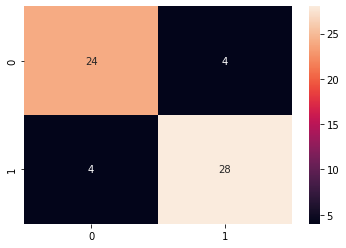

In [32]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)